In [1]:
%pip install boto3
%pip install pandas
%pip install matplotlib
%pip install io

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io
Note: you may need to restart the kernel to use updated packages.


In [2]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import io
import math

In [3]:
# Nome do bucket e arquivo
BUCKET_NAME = 'bucket-trusted-upa-connect-eduardo'  # seu bucket
CSV_FILE_KEY = 'camera_visao_comp_tratado.csv/part-00000-f0f426ad-1185-4a19-9418-a1100e28dd25-c000.csv'  # exemplo: 'pasta/arquivo.csv'

# Cria o cliente S3 usando a Role da EC2
s3 = boto3.client('s3')

# Faz o download do objeto CSV
obj = s3.get_object(Bucket=BUCKET_NAME, Key=CSV_FILE_KEY)

# Lê o CSV diretamente da memória
df = pd.read_csv(io.BytesIO(obj['Body'].read()))

/usr/local/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [4]:
# Exibe o DataFrame (opcional)
display(df)

,dia,numero_dia_semana,media_pessoas
0,2025-04-07,2,236.864865
1,2025-04-21,2,45.166667
2,2025-04-22,3,67.722222
3,2025-04-23,4,35.851852
4,2025-04-24,5,34.000000
5,2025-04-25,6,35.277778
6,2025-04-26,7,36.888889
7,2025-04-27,1,33.888889


In [5]:
# Converte a coluna 'dia' para datetime
df['dia'] = pd.to_datetime(df['dia'])

# Ordena pela data e seleciona os últimos 7 dias
df_ultimos_7 = df.sort_values(by='dia').tail(7)

In [6]:
# Cria o DataFrame mapeado
df_mapeado = pd.DataFrame()
df_mapeado['media'] = df_ultimos_7['media_pessoas'].apply(lambda x: round(x, 0))

# Nomear os dias da semana
nome_dias = {1: 'Dom', 2: 'Seg', 3: 'Ter', 4: 'Qua', 5: 'Qui', 6: 'Sex', 7: 'Sab'}
df_mapeado['dia_semana'] = df_ultimos_7['numero_dia_semana'].apply(lambda x: nome_dias[x])

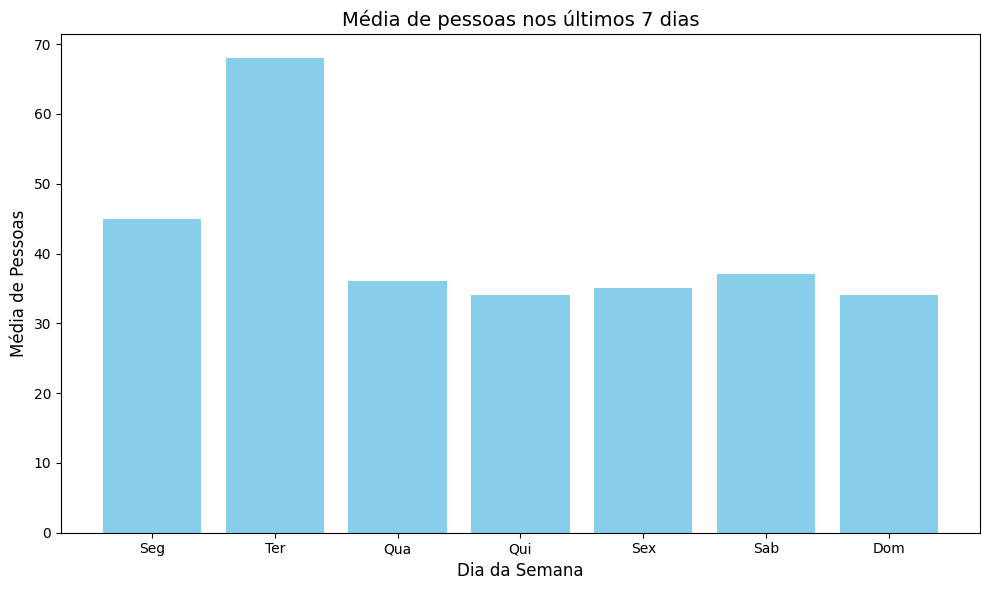

In [7]:
# Plotar o gráfico
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax.bar(df_mapeado['dia_semana'], df_mapeado['media'], color='skyblue')

ax.set_xlabel('Dia da Semana', fontsize=12)
ax.set_ylabel('Média de Pessoas', fontsize=12)
ax.set_title('Média de pessoas nos últimos 7 dias', fontsize=14)
plt.tight_layout()
plt.show()